In [1]:
from keras import layers
from keras import models
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#import os
#os.chdir('/content/drive/My Drive/deeplearning_cursoCienciaDados_Insight/notebooks/data/')
#os.system('mkdir state-farm-distracted-driver-detection')
#os.system('unzip -q "state-farm-distracted-driver-detection.zip" -d train')

## Loading and preprocessing the data from the problem: State Farm Distracted Driver Detection


In [11]:
RESOLUTION = 150
BATCH_SIZE = 256

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/deeplearning_cursoCienciaDados_Insight/notebooks/data/state-farm-distracted-driver-detection/',
        target_size=(RESOLUTION, RESOLUTION),
        class_mode='categorical', subset="training")

val_generator = val_datagen.flow_from_directory(
        '/content/drive/My Drive/deeplearning_cursoCienciaDados_Insight/notebooks/data/state-farm-distracted-driver-detection/',
        target_size=(RESOLUTION, RESOLUTION),
        class_mode='categorical', subset="validation")

Found 7826 images belonging to 10 classes.
Found 1379 images belonging to 10 classes.


In [5]:
train_generator.class_indices

{'c0': 0,
 'c1': 1,
 'c2': 2,
 'c3': 3,
 'c4': 4,
 'c5': 5,
 'c6': 6,
 'c7': 7,
 'c8': 8,
 'c9': 9}

## Traning a CNN model

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(filters= 100, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3))) #(image_height, image_width, image_channels) (not including the batch dimension).
model.add(layers.Conv2D(filters = 100, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) 
model.add(layers.Dense(units= 100, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

W0716 17:12:42.819839 139995497375616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 17:12:42.861369 139995497375616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 17:12:42.867733 139995497375616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0716 17:12:42.906389 139995497375616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 100)     2800      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 100)     90100     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 532900)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               53290100  
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 53,384,010
Trainable params: 53,384,010
Non-trainable params: 0
________________________________________________________________

In [8]:
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])

W0716 17:12:42.964514 139995497375616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0716 17:12:42.986473 139995497375616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0716 17:12:42.993526 139995497375616 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [19]:

N_TRAIN = 7826
N_VAL = 1379

history = model.fit_generator(
    train_generator,
    steps_per_epoch=(N_TRAIN // BATCH_SIZE),
    epochs=5,
    validation_data=val_generator,
    validation_steps=(N_VAL // BATCH_SIZE) 
    )

Epoch 1/5
30/30 [==============================] - 260s 9s/step - loss: 2.4546 - acc: 0.8469 - val_loss: 2.4474 - val_acc: 0.8473
Epoch 2/5
30/30 [==============================] - 251s 8s/step - loss: 2.4012 - acc: 0.8502 - val_loss: 2.4646 - val_acc: 0.8462
Epoch 3/5
30/30 [==============================] - 202s 7s/step - loss: 2.4492 - acc: 0.8472 - val_loss: 2.3845 - val_acc: 0.8513
Epoch 4/5
30/30 [==============================] - 6s 205ms/step - loss: 2.4379 - acc: 0.8479 - val_loss: 2.4045 - val_acc: 0.8500
Epoch 5/5
30/30 [==============================] - 7s 234ms/step - loss: 2.3511 - acc: 0.8533 - val_loss: 2.4446 - val_acc: 0.8475


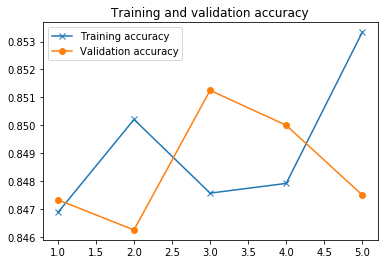

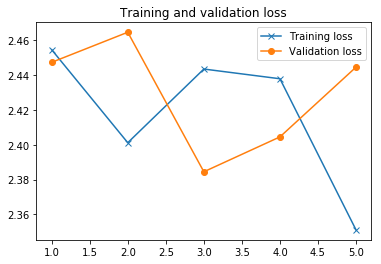

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training accuracy', marker='x')
plt.plot(epochs, val_acc, label='Validation accuracy', marker='o')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, label='Training loss', marker='x')
plt.plot(epochs, val_loss, label='Validation loss', marker='o')
plt.title('Training and validation loss')
plt.legend()

plt.show()